<a href="https://colab.research.google.com/github/sureshv0105/MachineLearning/blob/main/Leetcode_Problems_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data into a DataFrame
df = pd.read_csv('leetcode_progress.csv')

df = df.drop(['Unnamed: 0'], axis=1)

df['Try #1'].fillna(value='n/a', inplace=True)
df['Try #2'].fillna(value='n/a', inplace=True)

In [ ]:
df.head()

,Category,Difficulty,Name,Try #1,Try #2
0,Arrays,Easy,Two Sum,n/a,n/a
1,Arrays,Easy,Best Time to Buy and Sell Stock,n/a,n/a
2,Arrays,Easy,Contains Duplicate,n/a,n/a
3,Arrays,Medium,Product of Array Except Self,n/a,n/a
4,Arrays,Easy,Maximum Subarray,n/a,n/a


In [ ]:
df[df.isnull().any(axis=1)].count()

Category      0
Difficulty    0
Name          0
Try #1        0
Try #2        0
dtype: int64

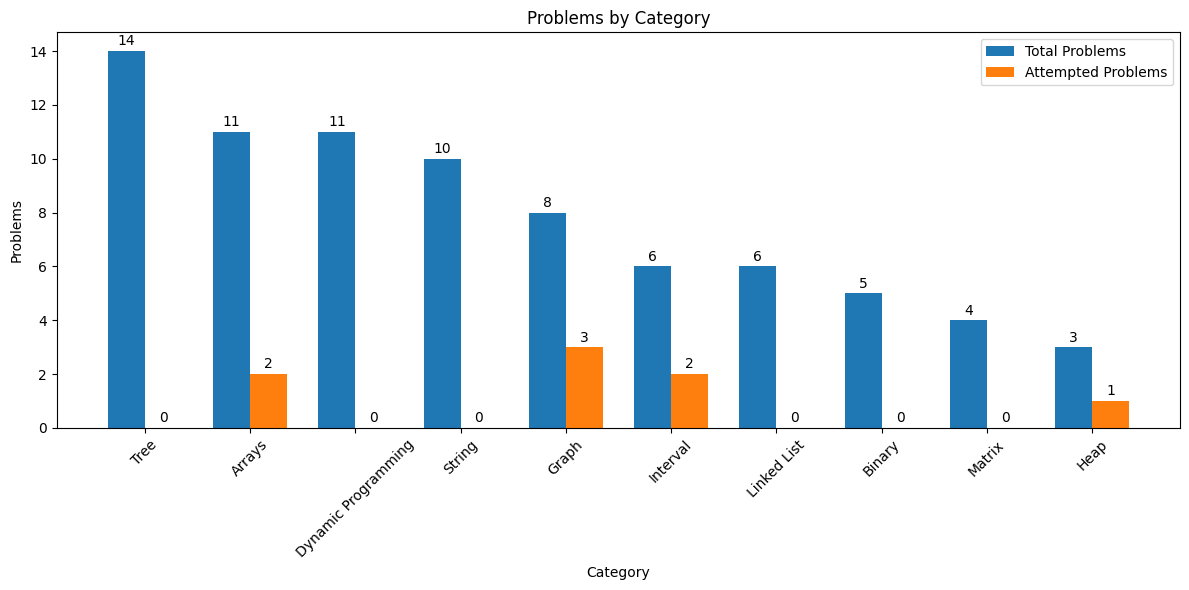

In [ ]:
# Count attempts by category
category_counts = df['Category'].value_counts()

# Attempted problems by category
attempted_counts = df[df['Try #1'].isin(['Yes', 'No'])]['Category'].value_counts()

# Combine both counts into a single DataFrame and align to handle mismatched categories
combined_counts = pd.concat([category_counts, attempted_counts], axis=1, keys=['Total Problems', 'Attempted Problems'])
combined_counts = combined_counts.fillna(0)  # Fill NaN (categories only in one count) with 0

# Create a bar chart for both total and attempted problems by category
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(combined_counts))

# Plot total problems
plt.bar(index, combined_counts['Total Problems'], bar_width, label='Total Problems')

# Plot attempted problems
plt.bar([i + bar_width for i in index], combined_counts['Attempted Problems'], bar_width, label='Attempted Problems')

# Add count numbers on top of the bars
for i, v in enumerate(combined_counts['Total Problems']):
    plt.text(i, v + 0.1, str(int(v)), ha='center', va='bottom')

for i, v in enumerate(combined_counts['Attempted Problems']):
    plt.text(i + bar_width, v + 0.1, str(int(v)), ha='center', va='bottom')


plt.xlabel('Category')
plt.ylabel('Problems')
plt.title('Problems by Category')
plt.xticks([i + bar_width / 2 for i in index], combined_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()